# ASL Alphabet EDA

In [2]:
#load packages

from glob import glob
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
from PIL import Image

## Basic information of ASL Alphabet dataset

### a. Size

In [3]:
!du -sh /home/asl/asl_alphabet_train
!du -sh /home/asl/asl_alphabet_test

1.2G	/home/asl/asl_alphabet_train
368K	/home/asl/asl_alphabet_test


### b. Categories

In [16]:
# define directories of training and testing dataset
train_dir = '/home/asl/asl_alphabet_train'
test_dir = '/home/asl/asl_alphabet_test'
classes = sorted(os.listdir(train_dir))


print("Total number of symbols: %s\n" %len(classes))
print("Symbols in ASL dataset: %s" %classes)

Total number of symbols: 29

Symbols in ASL dataset: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


### c. Image size

In [45]:
sample_image = Image.open('/home/asl/asl_alphabet_train/A/A1.jpg')
width, height = sample_image.size
print("Symbol: A\n")
print("Image size: %s %s" %(width, height))

Symbol: A

Image size: 200 200


In [46]:
sample_image = Image.open('/home/asl/asl_alphabet_train/E/E1.jpg')
width, height = sample_image.size
print("Symbol: E\n")
print("Image size: %s %s" %(width, height))

Symbol: E

Image size: 200 200


### d. Number of images in training dataset

In [14]:
# REF:https://www.kaggle.com/gargimaheshwari/asl-recognition-with-deep-learning 

# help function to load images from given directories
def image_loading(directory):
    images = []
    labels = []
    for idx, label in enumerate(classes):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [15]:
# load images
images, labels = load_images(directory = train_dir)

In [17]:
# check total number of image in training dataset
print("Total number of images: %s" %(len(images)))

Total number of images: 87000


### e. check images of each symbol

In [19]:
# help function to display images

def symbol_images(image_list):
    n = int(len(image_list) / len(classes))
    cols = 8
    rows = 4
    fig = plt.figure(figsize = (24, 12))

    for i in range(len(uniq_labels)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(image_list[int(n*i)])
        plt.title(uniq_labels[i])
        ax.title.set_fontsize(20)
        ax.axis('off')
    plt.show()

Training Images: 


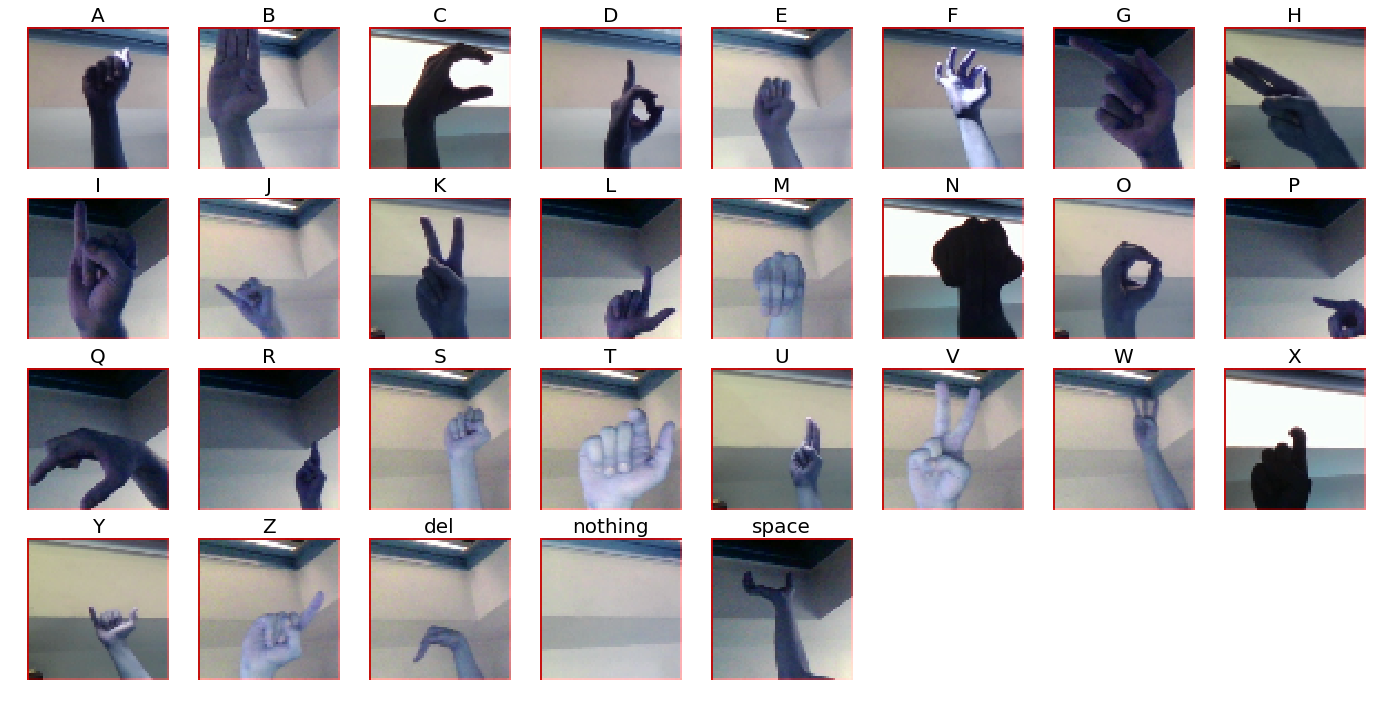

In [22]:
# check symbol images in training dataset

labels_arg = labels.argsort()
labels = labels[labels_arg]
images = images[labels_arg]

print("Training Images: ")
symbol_images(image_list = images)

### f. Intensity distributions

In [37]:
# REF: https://www.kaggle.com/paultimothymooney/interpret-sign-language-with-deep-learning

# help function for checking intensity distribution of images
def intensity_plot(input_image):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(input_image)
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 50
    plt.hist(input_image[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(input_image[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(input_image[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

Symbol: A


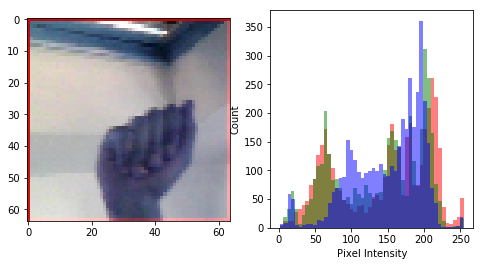

In [43]:
print("Symbol: %s" %classes[labels[1]])
intensity_plot(images[1])

Symbol: Q


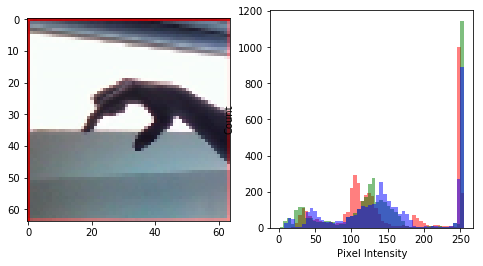

In [44]:
print("Symbol: %s" %classes[labels[50000]])
intensity_plot(images[50000])